# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup (Importing packages)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import http.client, urllib.request, urllib.parse, urllib.error, base64

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)  #These are tuple because it uses parathesis instead of brackets
lng_range = (-180, 180)

In [2]:
type(lat_range)

tuple

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500) #array because it is a numpy function
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500) #array because it is a numpy function
lat_lngs = zip(lats, lngs) #zip is a function that creates the container lat_lngs

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:   #looping through the cooordinates
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name #brings back the nearest city name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(type(cities[0])) #use to see what the data looks like

<class 'str'>


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# target_url = r'http://api.openweathermap.org/data/2.5/weather?q=london&APPID=' + api_keys.api_key #r makes it into a raw string  api_keys
# data = requests.get(target_url).json()
# print(data)

city_data = {'City':[], 'Cloudiness':[], 'Country':[], 'Date':[], 'Humidity':[], 'Lat':[], 'Lng':[], 'Max_Temp':[], 'Wind_Speed':[]}

 #City Cloudiness Country Date Humidity Lat Lng Max Temp Wind Speed 

print(enumerate(cities))

for i, city in enumerate(cities):
    print('processing record ' + str(i + 1) + ' out of '+ str(len(cities)))
    target_url = r'http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=' + city + '&APPID=' + api_keys.api_key #r makes it into a raw string  api_keys
    data = requests.get(target_url).json()
    
    if data['cod'] != 200:
        print('     City: '+ city +' not found. Skipping...')
    else:
        city_data['City'].append(data['name'])
        city_data['Cloudiness'].append(data['clouds']['all'])
        city_data['Country'].append(data['sys']['country'])
        city_data['Date'].append(data['dt'])
        city_data['Humidity'].append(data['main']['humidity'])
        city_data['Lat'].append(data['coord']['lat'])
        city_data['Lng'].append(data['coord']['lon'])
        city_data['Max_Temp'].append(data['main']['temp_max'])
        city_data['Wind_Speed'].append(data['wind']['speed'])
        print('     City: '+ city +' found adding to dataset')

print('All cities processed: ' + str(len(city_data)) + ' out of ' + str(len(cities)) + ' added to dataset')

processing record 1 out of 607
     City: victor harbor found adding to dataset
processing record 2 out of 607
     City: hithadhoo found adding to dataset
processing record 3 out of 607
     City: tiksi found adding to dataset
processing record 4 out of 607
     City: ushuaia found adding to dataset
processing record 5 out of 607
     City: gamboma found adding to dataset
processing record 6 out of 607
     City: necochea found adding to dataset
processing record 7 out of 607
     City: taolanaro not found. Skipping...
processing record 8 out of 607
     City: kuliyapitiya found adding to dataset
processing record 9 out of 607
     City: iqaluit found adding to dataset
processing record 10 out of 607
     City: yarada found adding to dataset
processing record 11 out of 607
     City: norman wells found adding to dataset
processing record 12 out of 607
     City: vila velha found adding to dataset
processing record 13 out of 607
     City: naze found adding to dataset
processing record

     City: treinta y tres found adding to dataset
processing record 108 out of 607
     City: eydhafushi found adding to dataset
processing record 109 out of 607
     City: lipin bor found adding to dataset
processing record 110 out of 607
     City: newport found adding to dataset
processing record 111 out of 607
     City: port keats found adding to dataset
processing record 112 out of 607
     City: saldanha found adding to dataset
processing record 113 out of 607
     City: ilulissat found adding to dataset
processing record 114 out of 607
     City: maneadero not found. Skipping...
processing record 115 out of 607
     City: sitka found adding to dataset
processing record 116 out of 607
     City: straumen found adding to dataset
processing record 117 out of 607
     City: bonfim found adding to dataset
processing record 118 out of 607
     City: meulaboh found adding to dataset
processing record 119 out of 607
     City: sibolga found adding to dataset
processing record 120 out o

     City: taoudenni found adding to dataset
processing record 216 out of 607
     City: zlobin found adding to dataset
processing record 217 out of 607
     City: atasu found adding to dataset
processing record 218 out of 607
     City: omboue found adding to dataset
processing record 219 out of 607
     City: ahuimanu found adding to dataset
processing record 220 out of 607
     City: aripuana found adding to dataset
processing record 221 out of 607
     City: yokadouma found adding to dataset
processing record 222 out of 607
     City: san quintin found adding to dataset
processing record 223 out of 607
     City: cidreira found adding to dataset
processing record 224 out of 607
     City: son la found adding to dataset
processing record 225 out of 607
     City: egvekinot found adding to dataset
processing record 226 out of 607
     City: beaverlodge found adding to dataset
processing record 227 out of 607
     City: atuona found adding to dataset
processing record 228 out of 607
 

     City: ketchikan found adding to dataset
processing record 323 out of 607
     City: isla aguada found adding to dataset
processing record 324 out of 607
     City: hunza not found. Skipping...
processing record 325 out of 607
     City: saint-joseph found adding to dataset
processing record 326 out of 607
     City: gamba found adding to dataset
processing record 327 out of 607
     City: flinders found adding to dataset
processing record 328 out of 607
     City: iberia found adding to dataset
processing record 329 out of 607
     City: constitucion found adding to dataset
processing record 330 out of 607
     City: santa cruz de tenerife found adding to dataset
processing record 331 out of 607
     City: barao de melgaco found adding to dataset
processing record 332 out of 607
     City: soyo found adding to dataset
processing record 333 out of 607
     City: kjollefjord found adding to dataset
processing record 334 out of 607
     City: fortuna found adding to dataset
processin

     City: mandalgovi found adding to dataset
processing record 430 out of 607
     City: concarneau found adding to dataset
processing record 431 out of 607
     City: garowe found adding to dataset
processing record 432 out of 607
     City: hay river found adding to dataset
processing record 433 out of 607
     City: ust-nera found adding to dataset
processing record 434 out of 607
     City: alta gracia found adding to dataset
processing record 435 out of 607
     City: millau found adding to dataset
processing record 436 out of 607
     City: vestmannaeyjar found adding to dataset
processing record 437 out of 607
     City: narsaq found adding to dataset
processing record 438 out of 607
     City: biarritz found adding to dataset
processing record 439 out of 607
     City: sorland found adding to dataset
processing record 440 out of 607
     City: suez found adding to dataset
processing record 441 out of 607
     City: dolores found adding to dataset
processing record 442 out of 6

     City: samusu not found. Skipping...
processing record 538 out of 607
     City: hanzhong found adding to dataset
processing record 539 out of 607
     City: tairua found adding to dataset
processing record 540 out of 607
     City: aden found adding to dataset
processing record 541 out of 607
     City: lamar found adding to dataset
processing record 542 out of 607
     City: patacamaya found adding to dataset
processing record 543 out of 607
     City: fort saint john not found. Skipping...
processing record 544 out of 607
     City: riyadh found adding to dataset
processing record 545 out of 607
     City: marau found adding to dataset
processing record 546 out of 607
     City: launceston found adding to dataset
processing record 547 out of 607
     City: karkaralinsk not found. Skipping...
processing record 548 out of 607
     City: inuvik found adding to dataset
processing record 549 out of 607
     City: muzhi found adding to dataset
processing record 550 out of 607
     Cit

In [9]:
print(pd.DataFrame(city_data).head())

            City  Cloudiness Country        Date  Humidity    Lat     Lng  \
0  Victor Harbor           0      AU  1537542000        87 -35.55  138.62   
1      Hithadhoo          88      MV  1537544160       100  -0.60   73.08   
2          Tiksi           0      RU  1537544160       100  71.64  128.87   
3        Ushuaia          75      AR  1537542000        87 -54.81  -68.31   
4        Gamboma           8      CG  1537544160        79  -1.87   15.88   

   Max_Temp  Wind_Speed  
0     50.00        4.70  
1     81.13        3.83  
2     26.68        9.75  
3     32.00       19.46  
4     85.99        4.72  


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
df = pd.DataFrame(city_data)
df.to_csv(output_data_file)


df.head()

       City  Cloudiness Country        Date  Humidity   Lat    Lng  Max_Temp  \
237  Talara           0      PE  1537542000       290 -4.58 -81.27      62.6   

     Wind_Speed  
237       16.11  


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,Victor Harbor,0,AU,1537542000,87,-35.55,138.62,50.00,4.70
1,Hithadhoo,88,MV,1537544160,100,-0.60,73.08,81.13,3.83
2,Tiksi,0,RU,1537544160,100,71.64,128.87,26.68,9.75
3,Ushuaia,75,AR,1537542000,87,-54.81,-68.31,32.00,19.46
4,Gamboma,8,CG,1537544160,79,-1.87,15.88,85.99,4.72


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

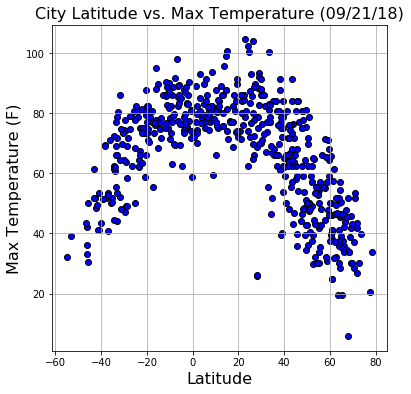

In [19]:
fig1 = plt.figure(figsize = (6,6))
subtemp = fig1.add_subplot(111)

subtemp.scatter(df['Lat'], df['Max_Temp'], color = 'blue', edgecolors = 'black')
subtemp.set_xlabel('Latitude', size = 16)
subtemp.set_ylabel('Max Temperature (F)', size = 16)
subtemp.set_title('City Latitude vs. Max Temperature (09/21/18)', size = 16)
subtemp.grid(linestyle = '-')
# subqb.set_xlim(1,16)

#### Latitude vs. Humidity Plot

(0, 105)

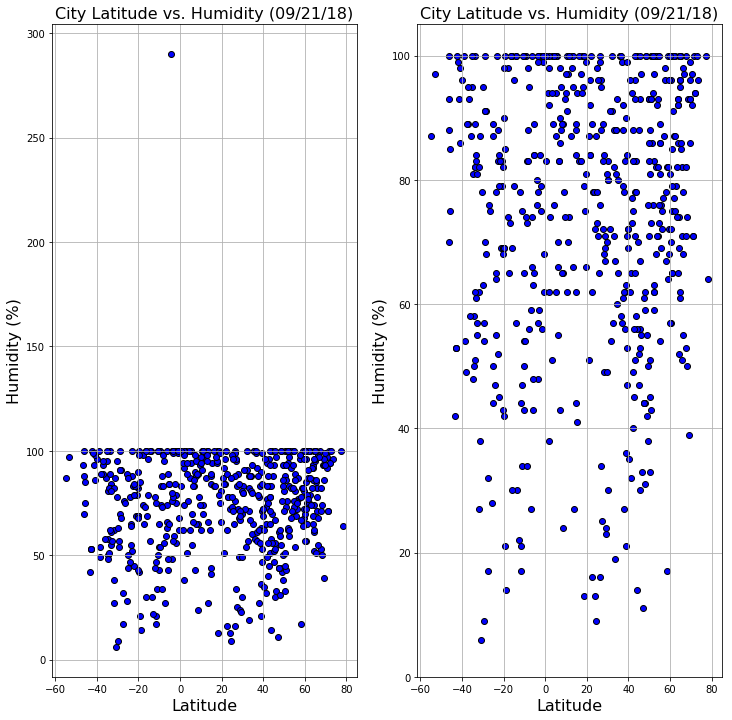

In [29]:
fig2 = plt.figure(figsize = (12,12))
subhum1 = fig2.add_subplot(121)

subhum1.scatter(df['Lat'], df['Humidity'], color = 'blue', edgecolors = 'black')
subhum1.set_xlabel('Latitude', size = 16)
subhum1.set_ylabel('Humidity (%)', size = 16)
subhum1.set_title('City Latitude vs. Humidity (09/21/18)', size = 16)
subhum1.grid(linestyle = '-')



subhum2 = fig2.add_subplot(122)

subhum2.scatter(df['Lat'], df['Humidity'], color = 'blue', edgecolors = 'black')
subhum2.set_xlabel('Latitude', size = 16)
subhum2.set_ylabel('Humidity (%)', size = 16)
subhum2.set_title('City Latitude vs. Humidity (09/21/18)', size = 16)
subhum2.grid(linestyle = '-')
subhum2.set_ylim(0,105)

In [26]:
print(df.loc[df['Humidity']>100]) #Looking for the outliner in subplot 1 which skewed the graph.  
#There is an error in the dataset 

       City  Cloudiness Country        Date  Humidity   Lat    Lng  Max_Temp  \
237  Talara           0      PE  1537542000       290 -4.58 -81.27      62.6   

     Wind_Speed  
237       16.11  


#### Latitude vs. Cloudiness Plot

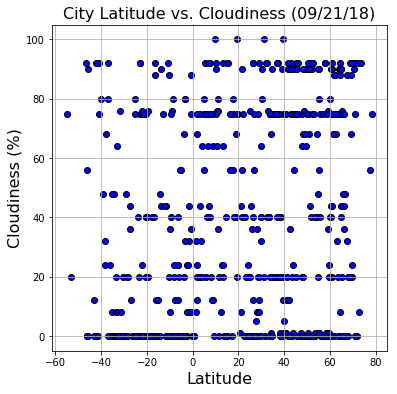

In [30]:
fig3 = plt.figure(figsize = (6,6))
subcloud = fig3.add_subplot(111)

subcloud.scatter(df['Lat'], df['Cloudiness'], color = 'blue', edgecolors = 'black')
subcloud.set_xlabel('Latitude', size = 16)
subcloud.set_ylabel('Cloudiness (%)', size = 16)
subcloud.set_title('City Latitude vs. Cloudiness (09/21/18)', size = 16)
subcloud.grid(linestyle = '-')



#### Latitude vs. Wind Speed Plot

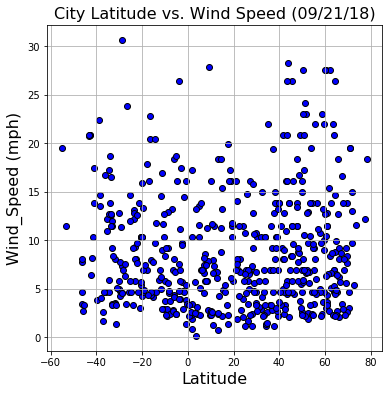

In [31]:
fig4 = plt.figure(figsize = (6,6))
subwind = fig4.add_subplot(111)

subwind.scatter(df['Lat'], df['Wind_Speed'], color = 'blue', edgecolors = 'black')
subwind.set_xlabel('Latitude', size = 16)
subwind.set_ylabel('Wind_Speed (mph)', size = 16)
subwind.set_title('City Latitude vs. Wind Speed (09/21/18)', size = 16)
subwind.grid(linestyle = '-')
